In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_json("exps.jsonl", lines=True)
df = df[df["params.dataset.path"] == "bdsaglam/drop-musique-mini"].copy()
print(len(df))
df.head()

26


,commit,id,name,params.dataset.path,params.dataset.name,params.dataset.split,params.qa.model,params.qa.temperature,params.qa.system_prompt,params.qa.user_prompt_template,...,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max,params.qa.technique,params.qa.instruction
0,be2593eecf7fd1d290f7efd77bf9f142ee3d7e10,4c3a8040449c9603bec5032b54162c41f53c442b,bifid-snow,bdsaglam/drop-musique-mini,default,train,deepseek-r1-llama-8b,0.0,empty.txt,icq-format.txt,...,65,799.169231,1610.523271,159,269.0,342.0,440.0,8193,REASONING,empty:icq-format:manual/reasoning
1,be2593eecf7fd1d290f7efd77bf9f142ee3d7e10,a5354126b8078a8578850a29c2b8f2a34a1ac2d3,ovoid-puds,bdsaglam/drop-musique-mini,default,train,deepseek-r1-llama-8b,0.0,empty.txt,icq-format.txt,...,63,521.571429,1005.241196,159,259.0,344.0,448.0,8065,REASONING,empty:icq-format:manual/reasoning
2,be2593eecf7fd1d290f7efd77bf9f142ee3d7e10,80698cde292df8ac95412aa9953826f94f6bba76,piano-mean,bdsaglam/drop-musique-mini,default,train,deepseek-r1-llama-8b,0.0,empty.txt,icq-format.txt,...,73,380.246575,212.387276,123,255.0,324.0,438.0,1308,REASONING,empty:icq-format:manual/reasoning
3,be2593eecf7fd1d290f7efd77bf9f142ee3d7e10,177129695d4899f693b218a96e449e6a2dbf2675,spumy-sign,bdsaglam/drop-musique-mini,default,train,deepseek-r1-llama-8b,0.0,empty.txt,icq-format.txt,...,69,711.971014,1534.491360,159,255.0,321.0,444.0,8193,REASONING,empty:icq-format:manual/reasoning
4,be2593eecf7fd1d290f7efd77bf9f142ee3d7e10,50f737766dbdddf92ac692d95a8aff45e9468c32,forte-haet,bdsaglam/drop-musique-mini,default,train,deepseek-r1-llama-8b,0.0,empty.txt,icq-format.txt,...,73,437.369863,814.629679,123,227.0,317.0,436.0,7161,REASONING,empty:icq-format:manual/reasoning


In [3]:
param_cols = [col for col in df.columns if col.startswith("params.")]
metric_cols = ['metrics.exact_match', 'metrics.f1']
df.drop(
    columns=[
        "id",
        "params.dataset.path",
        "params.dataset.name",
        "params.dataset.split",
    ],
    inplace=True,
)

In [4]:
target_param_cols = [
    "params.qa.model",
    "params.qa.temperature",
    "params.qa.technique",
    "params.qa.instruction",
    "params.qa.n_shot",
]
df = df.sort_values(target_param_cols + ["params.run"])
df.reset_index(drop=True, inplace=True)
df.head()

,commit,name,params.qa.model,params.qa.temperature,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.qa.n_sc,params.run,...,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max,params.qa.technique,params.qa.instruction
0,be2593eecf7fd1d290f7efd77bf9f142ee3d7e10,ovoid-puds,deepseek-r1-llama-8b,0.0,empty.txt,icq-format.txt,manual/reasoning.json,0,1,1,...,63,521.571429,1005.241196,159,259.0,344.0,448.0,8065,REASONING,empty:icq-format:manual/reasoning
1,be2593eecf7fd1d290f7efd77bf9f142ee3d7e10,spumy-sign,deepseek-r1-llama-8b,0.0,empty.txt,icq-format.txt,manual/reasoning.json,0,1,2,...,69,711.971014,1534.491360,159,255.0,321.0,444.0,8193,REASONING,empty:icq-format:manual/reasoning
2,be2593eecf7fd1d290f7efd77bf9f142ee3d7e10,bifid-snow,deepseek-r1-llama-8b,0.0,empty.txt,icq-format.txt,manual/reasoning.json,0,1,3,...,65,799.169231,1610.523271,159,269.0,342.0,440.0,8193,REASONING,empty:icq-format:manual/reasoning
3,be2593eecf7fd1d290f7efd77bf9f142ee3d7e10,heady-love,deepseek-r1-llama-8b,0.0,empty.txt,icq-format.txt,manual/reasoning.json,1,1,1,...,73,482.643836,946.476321,130,233.0,332.0,436.0,7930,REASONING,empty:icq-format:manual/reasoning
4,be2593eecf7fd1d290f7efd77bf9f142ee3d7e10,piano-mean,deepseek-r1-llama-8b,0.0,empty.txt,icq-format.txt,manual/reasoning.json,1,1,2,...,73,380.246575,212.387276,123,255.0,324.0,438.0,1308,REASONING,empty:icq-format:manual/reasoning


In [5]:
avg_df = (
    df.groupby(target_param_cols)[["name", *metric_cols]]
    .agg({"name": tuple, "metrics.exact_match": "mean", "metrics.f1": "mean"})
    .reset_index()
)
# find the rows with max f1 score for each technique group
max_f1_rows = avg_df.groupby("params.qa.technique")["metrics.f1"].idxmax()
best_df = avg_df.loc[
    max_f1_rows, ["name"] + target_param_cols + metric_cols[:2]
].sort_values("metrics.f1", ascending=False)
best_df

,name,params.qa.model,params.qa.temperature,params.qa.technique,params.qa.instruction,params.qa.n_shot,metrics.exact_match,metrics.f1
4,"(None,)",llama-3-8b,0.0,DIRECT,direct/format-few:cq:manual/direct,0,0.370000,0.599337
6,"(fatty-doit, woven-erns, purer-gram)",llama-3-8b,0.5,CCOT,ccot/format-thought:cq:manual/ccot,1,0.326667,0.554395
2,"(hated-fore, sport-kale, spicy-bael)",deepseek-r1-llama-8b,0.5,REASONING,empty:icq-format:manual/reasoning,0,0.130000,0.396456


In [6]:
for model in avg_df['params.qa.model'].unique():
    _df = avg_df[avg_df['params.qa.model'] == model].sort_values("metrics.f1", ascending=False)
    print('-'*120)
    display(_df)

------------------------------------------------------------------------------------------------------------------------


,params.qa.model,params.qa.temperature,params.qa.technique,params.qa.instruction,params.qa.n_shot,name,metrics.exact_match,metrics.f1
2,deepseek-r1-llama-8b,0.5,REASONING,empty:icq-format:manual/reasoning,0,"(hated-fore, sport-kale, spicy-bael)",0.130000,0.396456
0,deepseek-r1-llama-8b,0.0,REASONING,empty:icq-format:manual/reasoning,0,"(ovoid-puds, spumy-sign, bifid-snow)",0.096667,0.368489
1,deepseek-r1-llama-8b,0.0,REASONING,empty:icq-format:manual/reasoning,1,"(heady-love, piano-mean, forte-haet)",0.083333,0.323240
3,deepseek-r1-llama-8b,0.5,REASONING,empty:icq-format:manual/reasoning,1,"(prone-eric, loose-grub, whity-wave)",0.053333,0.296865


------------------------------------------------------------------------------------------------------------------------


,params.qa.model,params.qa.temperature,params.qa.technique,params.qa.instruction,params.qa.n_shot,name,metrics.exact_match,metrics.f1
4,llama-3-8b,0.0,DIRECT,direct/format-few:cq:manual/direct,0,"(None,)",0.370000,0.599337
6,llama-3-8b,0.5,CCOT,ccot/format-thought:cq:manual/ccot,1,"(fatty-doit, woven-erns, purer-gram)",0.326667,0.554395
7,llama-3-8b,0.5,DIRECT,direct/format-few:cq:manual/direct,0,"(nubby-gray, loyal-lees, worst-gude)",0.413333,0.553962
8,llama-3-8b,0.5,DIRECT,direct/format-few:cq:manual/direct,1,"(pawky-flex, gypsy-unau, ashen-keek)",0.373333,0.540744
5,llama-3-8b,0.5,CCOT,ccot/format-thought:cq:manual/ccot,0,"(sooty-hoot, niffy-jags, withy-hows)",0.293333,0.499110


------------------------------------------------------------------------------------------------------------------------


,params.qa.model,params.qa.temperature,params.qa.technique,params.qa.instruction,params.qa.n_shot,name,metrics.exact_match,metrics.f1
9,qwen-2.5-32b,0.0,DIRECT,direct/format-few:cq:manual/direct,0,"(None,)",0.37,0.599337


In [7]:
zs_avg_df = avg_df[avg_df['params.qa.n_shot'] == 0]
zs_max_f1_rows = zs_avg_df.groupby(["params.qa.technique", "params.qa.model"])["metrics.f1"].idxmax()
zs_best_df = zs_avg_df.loc[
    zs_max_f1_rows, ["name"] + target_param_cols + metric_cols[:2]
].sort_values("metrics.f1", ascending=False)
zs_best_df

,name,params.qa.model,params.qa.temperature,params.qa.technique,params.qa.instruction,params.qa.n_shot,metrics.exact_match,metrics.f1
4,"(None,)",llama-3-8b,0.0,DIRECT,direct/format-few:cq:manual/direct,0,0.370000,0.599337
9,"(None,)",qwen-2.5-32b,0.0,DIRECT,direct/format-few:cq:manual/direct,0,0.370000,0.599337
5,"(sooty-hoot, niffy-jags, withy-hows)",llama-3-8b,0.5,CCOT,ccot/format-thought:cq:manual/ccot,0,0.293333,0.499110
2,"(hated-fore, sport-kale, spicy-bael)",deepseek-r1-llama-8b,0.5,REASONING,empty:icq-format:manual/reasoning,0,0.130000,0.396456


In [8]:
fs_avg_df = avg_df[avg_df['params.qa.n_shot'] == 1]
fs_max_f1_rows = fs_avg_df.groupby("params.qa.technique")["metrics.f1"].idxmax()
fs_best_df = fs_avg_df.loc[
    fs_max_f1_rows, ["name"] + target_param_cols + metric_cols[:2]
].sort_values("metrics.f1", ascending=False)
fs_best_df

,name,params.qa.model,params.qa.temperature,params.qa.technique,params.qa.instruction,params.qa.n_shot,metrics.exact_match,metrics.f1
6,"(fatty-doit, woven-erns, purer-gram)",llama-3-8b,0.5,CCOT,ccot/format-thought:cq:manual/ccot,1,0.326667,0.554395
8,"(pawky-flex, gypsy-unau, ashen-keek)",llama-3-8b,0.5,DIRECT,direct/format-few:cq:manual/direct,1,0.373333,0.540744
1,"(heady-love, piano-mean, forte-haet)",deepseek-r1-llama-8b,0.0,REASONING,empty:icq-format:manual/reasoning,1,0.083333,0.323240


In [9]:
avg_df[avg_df["params.qa.model"] == "deepseek-r1-llama-70b-tgi"].sort_values("metrics.f1", ascending=False).drop(columns=['params.qa.technique', 'name'])

,params.qa.model,params.qa.temperature,params.qa.instruction,params.qa.n_shot,metrics.exact_match,metrics.f1


In [10]:
def plot_heatmap(df, metric_col):
    instructions = df["params.qa.instruction"].unique()
    n = len(instructions)
    n_cols = 2
    n_rows = (n + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 8, n_rows * 6))

    vmin = df[metric_col].min()
    vmax = df[metric_col].max()

    for ax, instruction in zip(axes.flatten(), instructions):
        subset_df = df[df["params.qa.instruction"] == instruction]
        pivot_table = subset_df.pivot_table(
            values=metric_col,
            index="params.qa.temperature",
            columns="params.qa.n_shot",
            aggfunc="mean",
        )
        sns.heatmap(
            pivot_table,
            annot=True,
            fmt=".3f",
            cmap="YlGnBu",
            ax=ax,
            yticklabels=True,
            vmin=vmin,
            vmax=vmax
        )
        ax.set_title(instruction)
        ax.set_xlabel("Number of Few-Shot Examples")
        ax.set_ylabel("Temperature")
        ax.invert_yaxis()

    # Remove any empty subplots
    for ax in axes.flatten()[n:]:
        fig.delaxes(ax)

    plt.tight_layout()
    plt.subplots_adjust(wspace=0.2, hspace=0.2)  # Add padding between plots

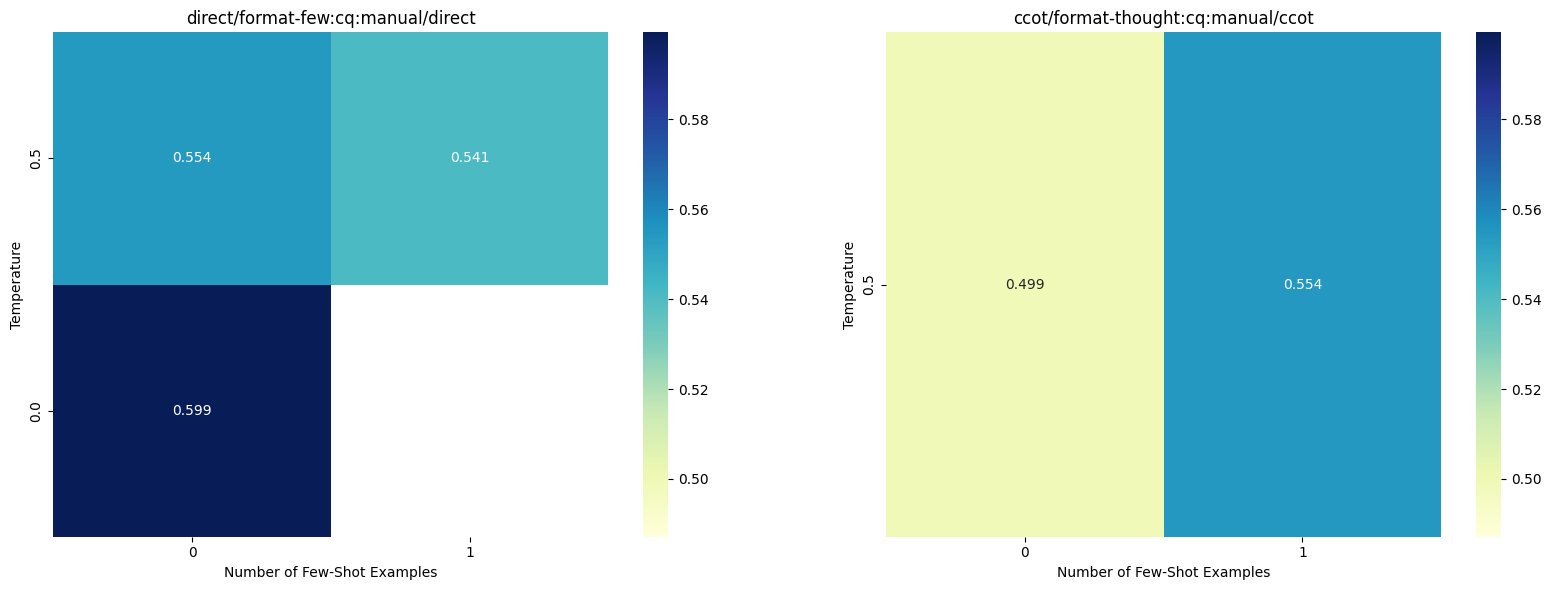

In [11]:
model = 'llama-3-8b'
plot_heatmap(df[df["params.qa.model"] == model], "metrics.f1")

In [12]:
def compare_grid(df):
    models = df["params.qa.model"].unique()
    instructions = df["params.qa.instruction"].unique()
    n = len(models)
    n_cols = 2
    n_rows = (n + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 8, n_rows * 6))

    # Define a more distinct color palette and map each instruction to a specific color
    palette = sns.color_palette("colorblind", len(instructions))
    instruction_colors = dict(zip(instructions, palette))

    for ax, model in zip(axes.flatten(), models):
        subset_df = df[df["params.qa.model"] == model]
        pivot_table = subset_df.pivot_table(
            values="metrics.f1",
            index="params.qa.temperature",
            columns="params.qa.instruction",
            aggfunc="mean",
        )
        pivot_table.plot(
            title=f"{model}",
            xlabel="Temperature",
            ylabel="F1 Score",
            style="o-",
            ax=ax,
            color=[instruction_colors[instruction] for instruction in pivot_table.columns]
        )
        ax.set_ylim(0, 1)  # Set y-axis limits

    # Remove any empty subplots
    for ax in axes.flatten()[n:]:
        fig.delaxes(ax)

    plt.tight_layout()
    plt.subplots_adjust(wspace=0.2, hspace=0.4)  # Add padding between plots
    plt.show()


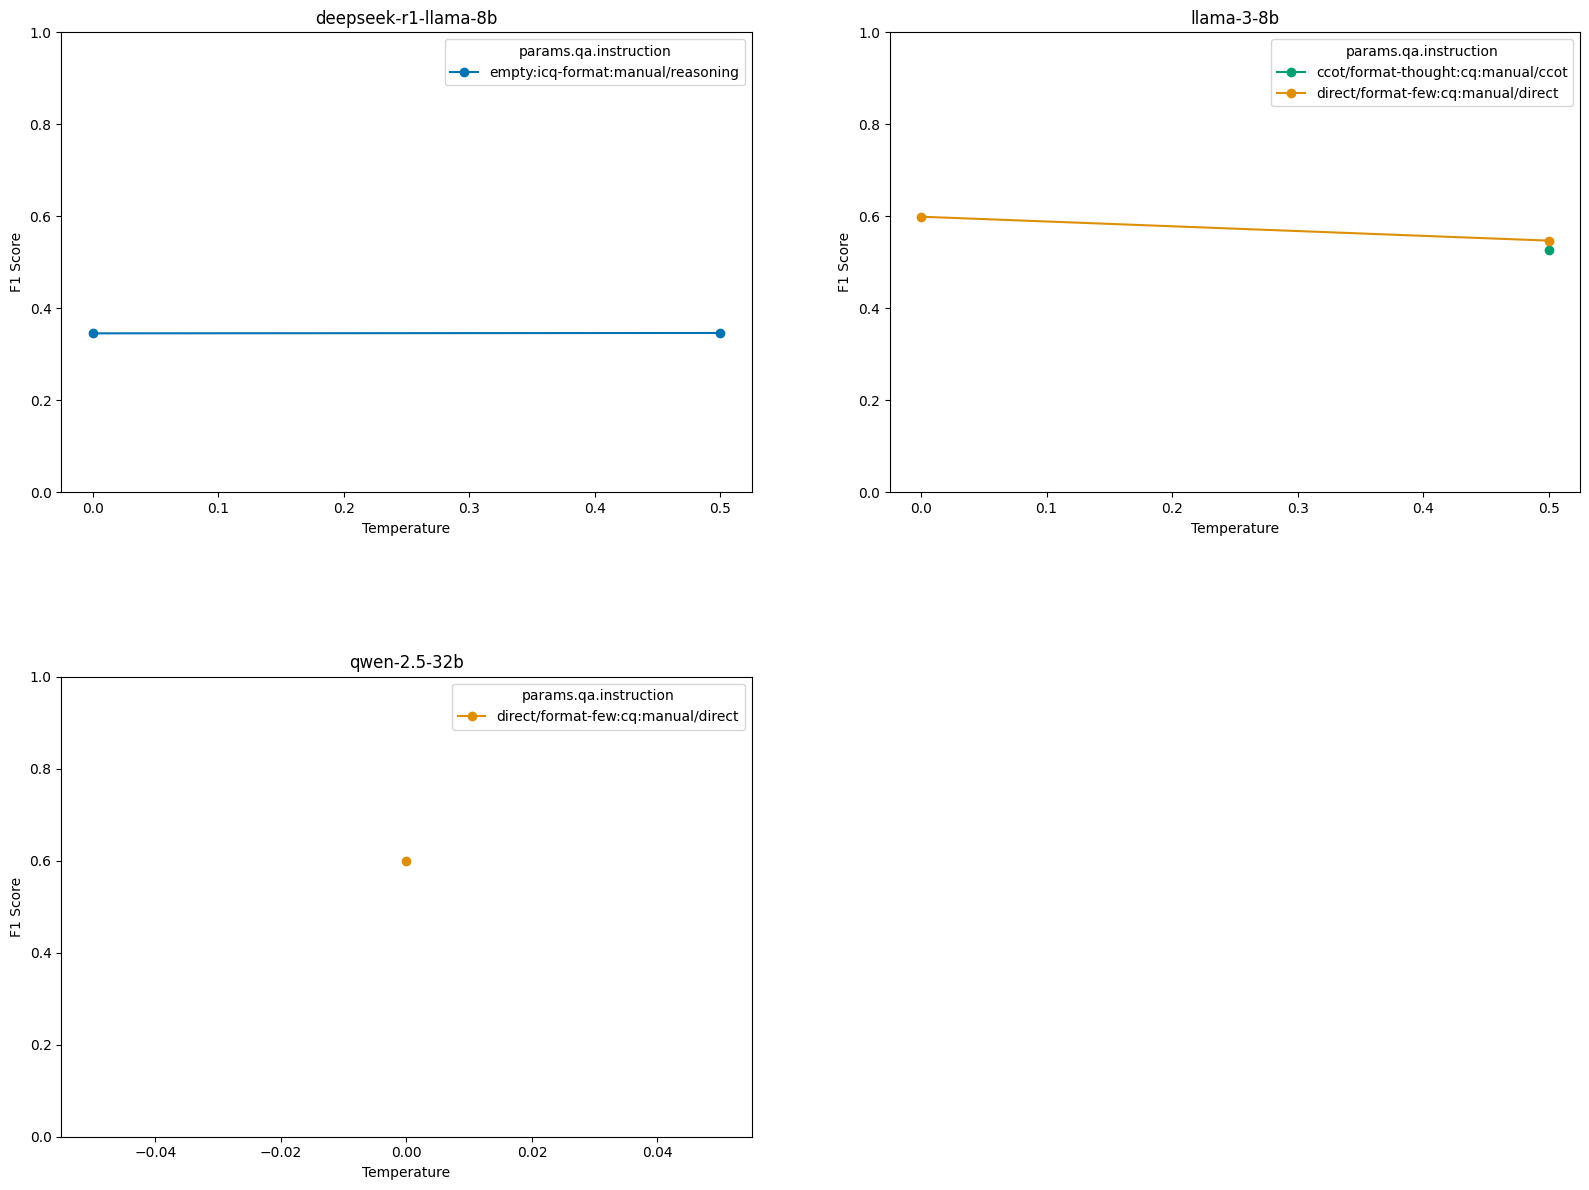

In [13]:
compare_grid(df)